In [86]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [130]:
def tranforma_img(img, m, x):
    # Converter a imagem para o espaço de cores HSV
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    inicio, fim = 0, 0
    if m - x < 0:
        inicio = 360 - (m - x)
    else:
        inicio = m - x
    
    if m + x > 360:
        fim = m + x - 360
    else:
        fim = m + x

    print(inicio, fim)


    for i in range(np.shape(img_hsv)[0]):
        for j in range(np.shape(img_hsv)[1]):
            h = img_hsv[i][j][0]
                

    # Definir os limites inferiores e superiores para o intervalo [m - x, m + x]
    lower_bound = (m - x) % 180
    upper_bound = (m + x) % 180

    # Inverter a matiz no intervalo [m - x, m + x]
    img_hsv[..., 0] = np.where(
        img_hsv[..., 0] >= lower_bound,
        (img_hsv[..., 0] - lower_bound + upper_bound) % 180,
        img_hsv[..., 0]
    )

    # Converter a imagem de volta para o espaço de cores BGR
    img_result = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

    return img_result

310 30


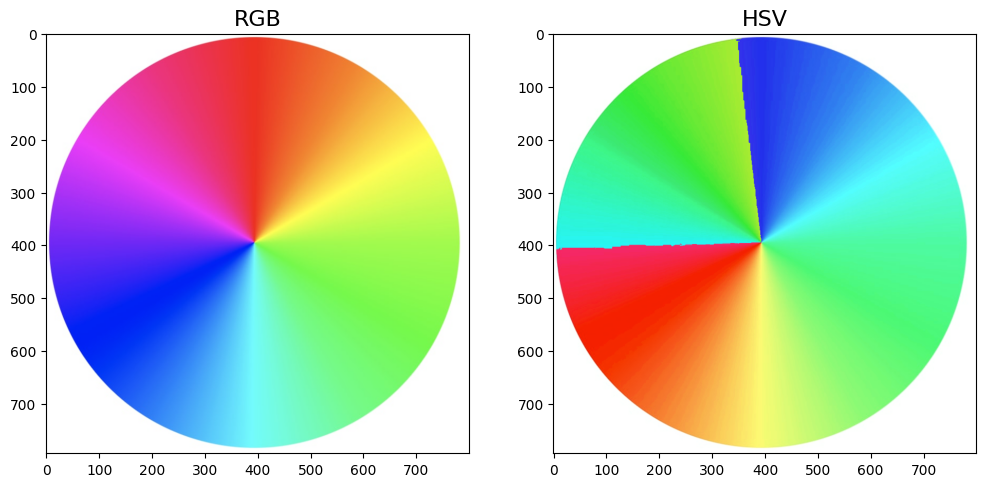

In [133]:
img = cv2.imread("circulo_cromatico.jpeg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

teste_rgb = tranforma_img(img, 350, 40)

# Salvar a imagem convertida em HSV
plt.figure(figsize = ((12, 6)))
plt.subplot(1, 2, 1)
plt.title("RGB", fontsize = 16)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(teste_rgb)
plt.title("HSV", fontsize = 16)
plt.show()